<a href="https://colab.research.google.com/github/fay421/ML_LinearRegression/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Project- Car Price Prediction

### About Dataset

####Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

####Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##The Columns

Car_ID : Unique id of each observation (Interger)

Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.

carCompany : Name of car company (Categorical)

fueltype : Car fuel type i.e gas or diesel (Categorical)

aspiration : Aspiration used in a car (Categorical)

doornumber : Number of doors in a car (Categorical)

carbody : body of car (Categorical)

drivewheel : type of drive wheel (Categorical)

enginelocation : Location of car engine (Categorical)

wheelbase : Weelbase of car (Numeric)

carlength : Length of car (Numeric)

carwidth : Width of car (Numeric)

carheight : height of car (Numeric)

curbweight : The weight of a car without occupants or baggage. (Numeric)

enginetype : Type of engine. (Categorical)

cylindernumber : cylinder placed in the car (Categorical)

enginesize : Size of car (Numeric)

fuelsystem : Fuel system of car (Categorical)

boreratio : Boreratio of car (Numeric)

stroke : Stroke or volume inside the engine (Numeric)

compressionratio : compression ratio of car (Numeric)

horsepower : Horsepower (Numeric)

peakrpm : car peak rpm (Numeric)

citympg : Mileage in city (Numeric)

highwaympg : Mileage on highway (Numeric)

price(Dependent variable) : Price of car (Numeric)

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Read in the CarPrice_Assignment csv file as a DataFrame called df

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

## EDA

In [39]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
df.shape

(205, 26)

In [41]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64



*   Avg of Price = 13277
*   Min of Price = 5118
*   Max of Price = 45400





In [ ]:
# remove car_ID

df=df.drop('car_ID',axis =1)

In [42]:
# remove all categorical columns

df=df.drop(['CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber','fuelsystem'],axis =1)

##Visualization

In [46]:
df.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64


####The correlation analysis indicates that the car features such as enginesize, curbweight, and horsepower have a strong positive correlation with the car's price, suggesting that larger, heavier, and more powerful cars tend to have higher prices. Conversely, highwaympg and citympg show strong negative correlations, implying that fuel efficiency is inversely related to the car's price.

## Join Plot

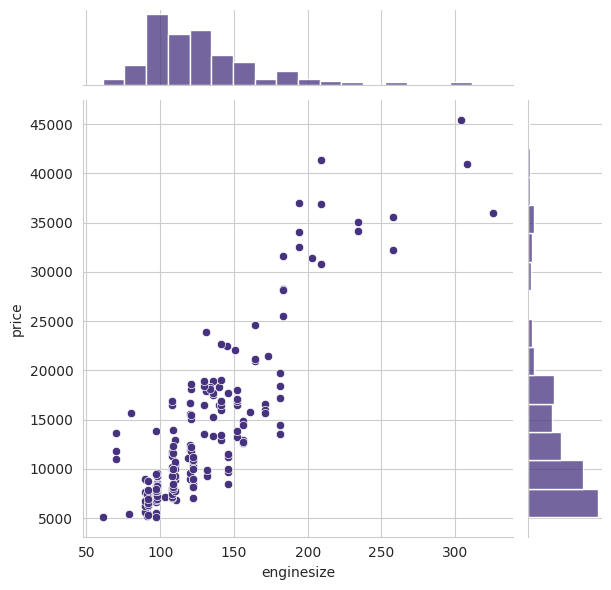

In [67]:
# setup:
sns.set_palette("viridis")
sns.set_style('whitegrid')

# joinplot
sns.jointplot(data=df,x='enginesize', y='price');

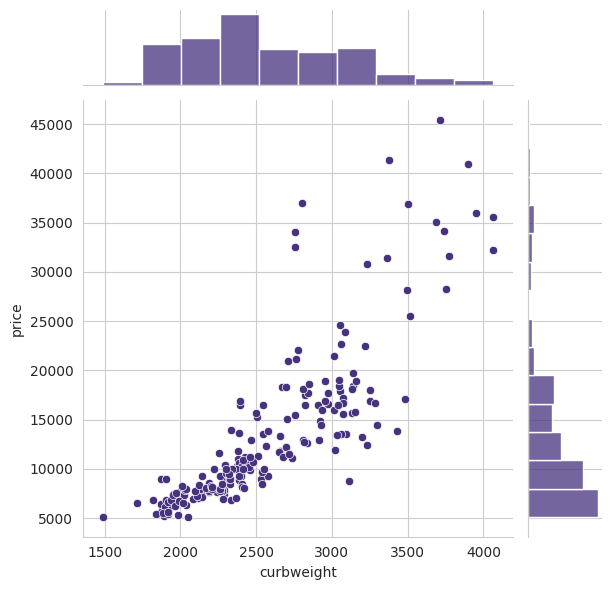

In [68]:
sns.jointplot(data=df,x='curbweight', y='price');

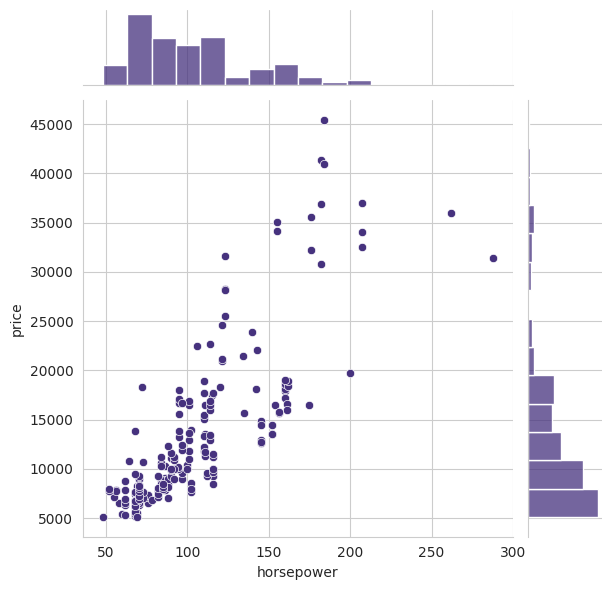

In [69]:
sns.jointplot(data=df,x='horsepower', y='price');

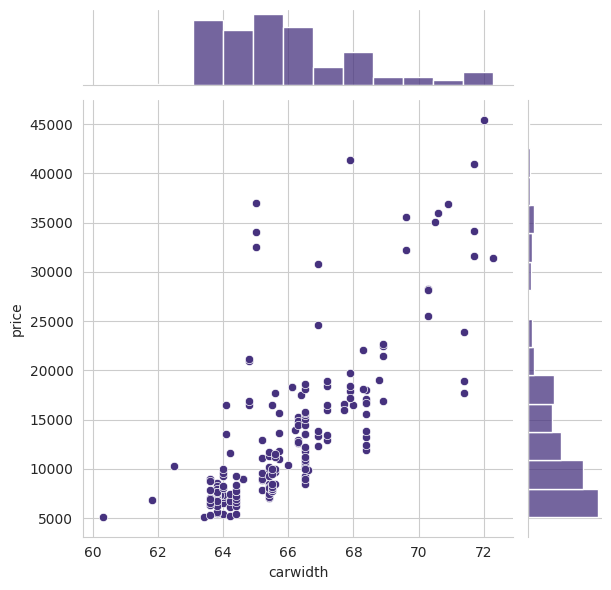

In [70]:
sns.jointplot(data=df,x='carwidth', y='price');

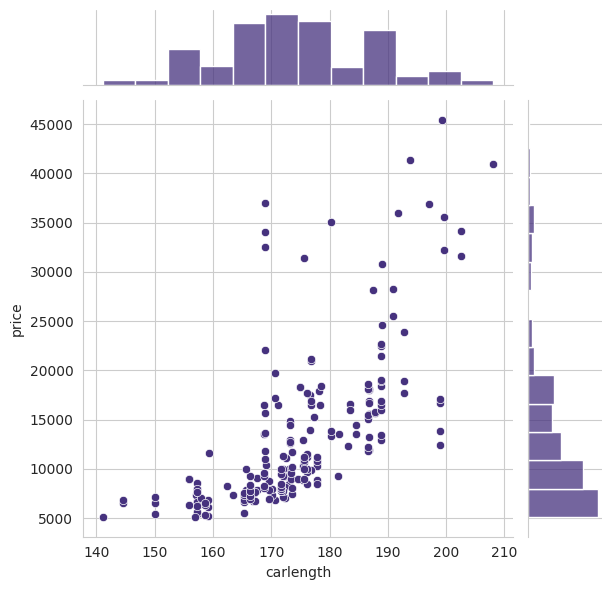

In [71]:
sns.jointplot(data=df,x='carlength', y='price');



## Training and Testing Data




In [72]:
X = df.iloc[:,:-1] #set a variable X equal to the numerical features
y = df.iloc[: ,-1] #set variable y equal to the "price" column

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test ,y_train , y_test =train_test_split( X,y, test_size=0.2 , random_state= 42)

## Training the Model

In [79]:
from sklearn.linear_model import LinearRegression

### Create an instance of a LinearRegression() model named LR

In [80]:
LR=LinearRegression()

### Fit lm on the training data

In [81]:
LR.fit(X_train,y_train)

LinearRegression()

Print out the coefficients and intercept of the model

In [82]:
print('Coefficients: \n ' , LR.coef_)
print('Intercept: \n' , LR.intercept_)

Coefficients: 
  [ 2.08925033e+02  1.40385781e+02 -7.78472888e+01  5.25580891e+02
  2.01090018e+02  4.45754407e-01  1.23348827e+02 -3.63203632e+02
 -3.18813291e+03  3.61030613e+02  1.79331085e+01  2.58860271e+00
 -4.64861603e+02  2.25531324e+02]
Intercept: 
 -51944.70156970879


## Predicting Test Data

In [83]:
y_pred = LR.predict(X_test)

### Create a scatterplot of the real test values versus the predicted values

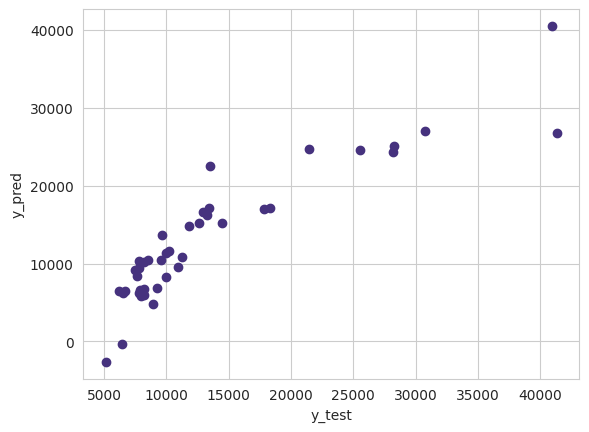

In [84]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred');

## Evaluating the Model
Let's evaluate our model performance by calculating the Mean Absolute Error, Mean Squared Error, the Root Mean Squared Error and R2 Score.

In [85]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2680.429983159394
MSE: 14358029.116948253
RMSE: 3789.199007303292


In [87]:
R2=r2_score(y_test, y_pred)
print('R2_Score: \n',R2)

R2_Score: 
 0.8181239192410069


##Conclusion

In [90]:
coeffecients = pd.DataFrame(LR.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
symboling,208.925033
wheelbase,140.385781
carlength,-77.847289
carwidth,525.580891
carheight,201.090018
curbweight,0.445754
enginesize,123.348827
boreratio,-363.203632
stroke,-3188.132914
compressionratio,361.030613


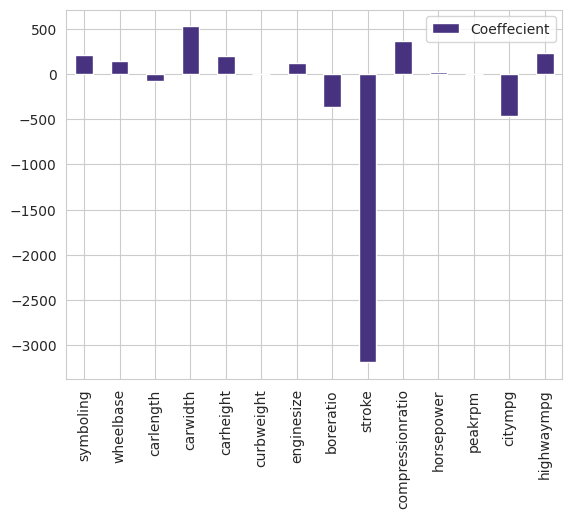

In [91]:
coeffecients.plot(kind='bar');

## The coefficients in a linear regression model represent the change in the dependent variable (in this case, likely car price) for a one-unit change in the corresponding independent variable, while holding other variables constant.

For example:



*   A positive coefficient for "carwidth" (525.58) suggests that, on average, an increase in car width by one unit is associated with an increase in car price.
*   A negative coefficient for "curbweight" (0.45) suggests that, on average, an increase in curb weight by one unit is associated with a slight decrease in car price.


*   A negative coefficient for "citympg" (-464.86) suggests that, on average, a one-unit increase in city miles per gallon is associated with a decrease in car price.





